In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy as sp
import os
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud    

In [2]:

import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [3]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from google.colab import files
files.download("/content/drive/MyDrive/reviews_Electronics_5.json.gz")
df = pd.read_json("/content/drive/MyDrive/reviews_Electronics_5.json.gz", compression='gzip', lines=True)
df.to_csv("amazon.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   reviewerID      1689188 non-null  object
 1   asin            1689188 non-null  object
 2   reviewerName    1664458 non-null  object
 3   helpful         1689188 non-null  object
 4   reviewText      1689188 non-null  object
 5   overall         1689188 non-null  int64 
 6   summary         1689188 non-null  object
 7   unixReviewTime  1689188 non-null  int64 
 8   reviewTime      1689188 non-null  object
dtypes: int64(2), object(7)
memory usage: 116.0+ MB
None


In [8]:
df.to_csv('amazon.csv')

In [9]:
display(df.head(10))

reviewerID        asin                           reviewerName  \
0   AO94DHGC771SJ  0528881469                                amazdnu   
1   AMO214LNFCEI4  0528881469                        Amazon Customer   
2  A3N7T0DY83Y4IG  0528881469                          C. A. Freeman   
3  A1H8PY3QHMQQA0  0528881469               Dave M. Shaw "mack dave"   
4  A24EV6RXELQZ63  0528881469                            Wayne Smith   
5  A2JXAZZI9PHK9Z  0594451647          Billy G. Noland "Bill Noland"   
6  A2P5U7BDKKT7FW  0594451647                              Christian   
7   AAZ084UMH8VZ2  0594451647  D. L. Brown "A Knower Of Good Things"   
8   AEZ3CR6BKIROJ  0594451647                           Mark Dietter   
9  A3BY5KCNQZXV5U  0594451647                                Matenai   

    helpful                                         reviewText  overall  \
0    [0, 0]  We got this GPS for my husband who is an (OTR)...        5   
1  [12, 15]  I'm a professional OTR truck driver, and I bou...        1   
2  [43, 45]  Well, what can I say.  I've had this unit in m...        3   
3   [9, 10]  Not going to write a long review, even thought...        2   
4    [0, 0]  I've had mine for a year and here's what we go...        1   
5    [3, 3]  I am using this with a Nook HD+. It works as d...        5   
6    [0, 0]  The cable is very wobbly and sometimes disconn...        2   
7    [0, 0]  This adaptor is real easy to setup and use rig...        5   
8    [0, 0]  This adapter easily connects my Nook HD 7&#34;...        4   
9    [3, 3]  This product really works great but I found th...        5   

                                    summary  unixReviewTime   reviewTime  
0                           Gotta have GPS!      1370131200   06 2, 2013  
1                         Very Disappointed      1290643200  11 25, 2010  
2                            1st impression      1283990400   09 9, 2010  
3                   Great grafics, POOR GPS      1290556800  11 24, 2010  
4    Major issues, only excuses for support      1317254400  09 29, 2011  
5                   HDMI Nook adapter cable      1388707200   01 3, 2014  
6                    Cheap proprietary scam      1398556800  04 27, 2014  
7               A Perfdect Nook HD+ hook up      1399161600   05 4, 2014  
8             A nice easy to use accessory.      1405036800  07 11, 2014  
9  This works great but read the details...      1390176000  01 20, 2014

In [10]:
!ls -al

total 1256152
drwxr-xr-x 1 root root       4096 Jan  9 20:14 .
drwxr-xr-x 1 root root       4096 Jan  9 20:10 ..
-rw-r--r-- 1 root root 1264147732 Jan  9 20:24 amazon.csv
drwxr-xr-x 4 root root       4096 Jan  5 14:33 .config
drwx------ 5 root root       4096 Jan  9 20:12 drive
-rw-r--r-- 1 root root   22124965 Jan  9 20:14 reamazon_thirtythousand.csv
drwxr-xr-x 1 root root       4096 Jan  5 14:34 sample_data


In [11]:
from datetime import datetime

condition = lambda row: datetime.fromtimestamp(row).strftime("%m-%d-%Y")
df["unixReviewTime"] = df["unixReviewTime"].apply(condition)

In [12]:
df.drop(labels="reviewTime", axis=1, inplace=True)

display(df.head())

reviewerID        asin              reviewerName   helpful  \
0   AO94DHGC771SJ  0528881469                   amazdnu    [0, 0]   
1   AMO214LNFCEI4  0528881469           Amazon Customer  [12, 15]   
2  A3N7T0DY83Y4IG  0528881469             C. A. Freeman  [43, 45]   
3  A1H8PY3QHMQQA0  0528881469  Dave M. Shaw "mack dave"   [9, 10]   
4  A24EV6RXELQZ63  0528881469               Wayne Smith    [0, 0]   

                                          reviewText  overall  \
0  We got this GPS for my husband who is an (OTR)...        5   
1  I'm a professional OTR truck driver, and I bou...        1   
2  Well, what can I say.  I've had this unit in m...        3   
3  Not going to write a long review, even thought...        2   
4  I've had mine for a year and here's what we go...        1   

                                  summary unixReviewTime  
0                         Gotta have GPS!     06-02-2013  
1                       Very Disappointed     11-25-2010  
2                          1st impression     09-09-2010  
3                 Great grafics, POOR GPS     11-24-2010  
4  Major issues, only excuses for support     09-29-2011

In [13]:
print(df["reviewText"].iloc[0])

We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that's just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!


In [14]:
print(df.overall.unique())

[5 1 3 2 4]


In [15]:
sample_review = df["reviewText"].iloc[1689185]
print(sample_review)

I&#8217;m a big fan of the Brainwavz S1 (actually all of their headphones &#8211; have yet to be disappointed with any of their products). The S1 has been my main set for active use (e.g., workouts, runs, etc.) since the flat cable is very durable and resistant to tangles. The S5 keeps all the good features of the S1 and adds to it &#8211; the sound quality is richer and better defined.That&#8217;s not to say the S1 sounds poor &#8211; they are quite good, in fact. But the S5 are better. The highs are better defined and the midrange has more punch to it. The bass comes through clearly without moving into the harsh territory when the volume is pushed (as the S1s can do). The overall sound quality is very pleasing.The build quality seems solid &#8211; as solid as the S1 or better. I love the flat cable! I know that&#8217;s something that is not appreciated by everyone, but for me it&#8217;s been working out wonderfully. Although this (as most other Brainwavz headsets) comes with an excel

In [16]:
df= df.sample(12000)

In [17]:
df.to_csv('reamazon_twelwethousand.csv')

In [18]:
df.shape

(12000, 8)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1374656 to 408325
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      12000 non-null  object
 1   asin            12000 non-null  object
 2   reviewerName    11817 non-null  object
 3   helpful         12000 non-null  object
 4   reviewText      12000 non-null  object
 5   overall         12000 non-null  int64 
 6   summary         12000 non-null  object
 7   unixReviewTime  12000 non-null  object
dtypes: int64(1), object(7)
memory usage: 843.8+ KB


In [20]:
df.head(10)

reviewerID        asin       reviewerName helpful  \
1374656  A3M7JD51RIFPNL  B00892RUTA        Tony Ibarra  [0, 0]   
873817   A3S5EXYZDEBF3K  B0041OSQ9I       Brian Morris  [3, 3]   
805968   A2EK78B8JYIND3  B003NYQHFW                 DS  [0, 0]   
574841   A3CO04R4N5R1E9  B0029LDDPM     David Henchman  [0, 0]   
1522054  A1A0JA47QHWHLZ  B00AGOSQI8                Rob  [0, 0]   
497827    A4JZOZEZ8NLUA  B001NIEK3Q               Diva  [0, 0]   
1260112  A3RACIXI8CK305  B0071BTJPI                Ken  [0, 0]   
1603928   A8WMVITPT6NP7  B00D02AG7C  Richard S. Teeple  [1, 1]   
515724    A6YA25TZ6IDWH  B001QUA6RA              Scott  [0, 0]   
695757    ASK5AZ868YAY9  B00316263Y         M. Canning  [0, 0]   

                                                reviewText  overall  \
1374656  I made it work.  It was to long so I had to cu...        3   
873817   I'm very excited to receive this small USB 3.0...        5   
805968   The battery ran fine until it's one year warra...        2   
574841   I started with a Legend Cx, moved up to the Da...        5   
1522054  To start I have never flew an RC anything befo...        4   
497827   I use this on the big screen tv, my desktop, l...        5   
1260112  I tried keeping this device in light to keep i...        2   
1603928  pretty cool little device. didnt think i would...        4   
515724   I have 3 of these TRENDnet 8-port gigabit swit...        5   
695757   This is a quality cable. You can go to one of ...        5   

                                                   summary unixReviewTime  
1374656                           Good solid ceiling mount     10-02-2013  
873817   No driver installs and no auto bloatware -- WO...     11-24-2010  
805968                      Does not function after a year     09-04-2012  
574841                                      Upgraded again     01-03-2014  
1522054                                Not too hard to fly     03-09-2014  
497827                        Works well on 3D glasses too     02-14-2013  
1260112                               Battery Died already     01-02-2014  
1603928                                                tab     02-18-2014  
515724                              Great, reliable switch     02-15-2012  
695757                               BlueRigger HDMI Cable     10-12-2010

In [21]:
df.loc[df['overall'] == 3, 'sentiment'] = 'neutral' 
df.loc[df['overall'] < 3, 'sentiment'] = 'negative' 
df.loc[df['overall'] > 3, 'sentiment'] = 'positive'

In [22]:
df['sentiment'].value_counts()

positive    9581
negative    1385
neutral     1034
Name: sentiment, dtype: int64

In [23]:
df['Textlength'] = df['reviewText'].apply(lambda x:len(x.split()))
df.head()

reviewerID        asin    reviewerName helpful  \
1374656  A3M7JD51RIFPNL  B00892RUTA     Tony Ibarra  [0, 0]   
873817   A3S5EXYZDEBF3K  B0041OSQ9I    Brian Morris  [3, 3]   
805968   A2EK78B8JYIND3  B003NYQHFW              DS  [0, 0]   
574841   A3CO04R4N5R1E9  B0029LDDPM  David Henchman  [0, 0]   
1522054  A1A0JA47QHWHLZ  B00AGOSQI8             Rob  [0, 0]   

                                                reviewText  overall  \
1374656  I made it work.  It was to long so I had to cu...        3   
873817   I'm very excited to receive this small USB 3.0...        5   
805968   The battery ran fine until it's one year warra...        2   
574841   I started with a Legend Cx, moved up to the Da...        5   
1522054  To start I have never flew an RC anything befo...        4   

                                                   summary unixReviewTime  \
1374656                           Good solid ceiling mount     10-02-2013   
873817   No driver installs and no auto bloatware -- WO...     11-24-2010   
805968                      Does not function after a year     09-04-2012   
574841                                      Upgraded again     01-03-2014   
1522054                                Not too hard to fly     03-09-2014   

        sentiment  Textlength  
1374656   neutral          49  
873817   positive         261  
805968   negative          54  
574841   positive          35  
1522054  positive         166

sentiment
negative    134.102527
neutral     149.525145
positive    112.647740
Name: Textlength, dtype: float64

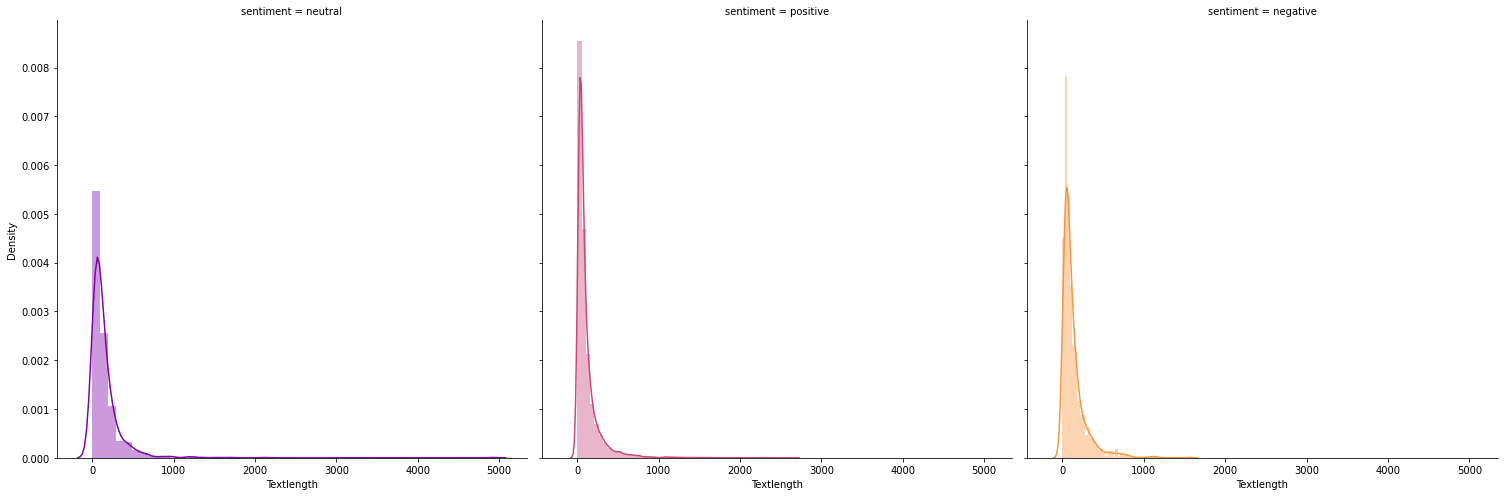

In [24]:
a = sns.FacetGrid(data = df, col = 'sentiment', hue = 'sentiment', palette='plasma', size=7)
a.map(sns.distplot, "Textlength")
df.groupby('sentiment').mean()['Textlength']

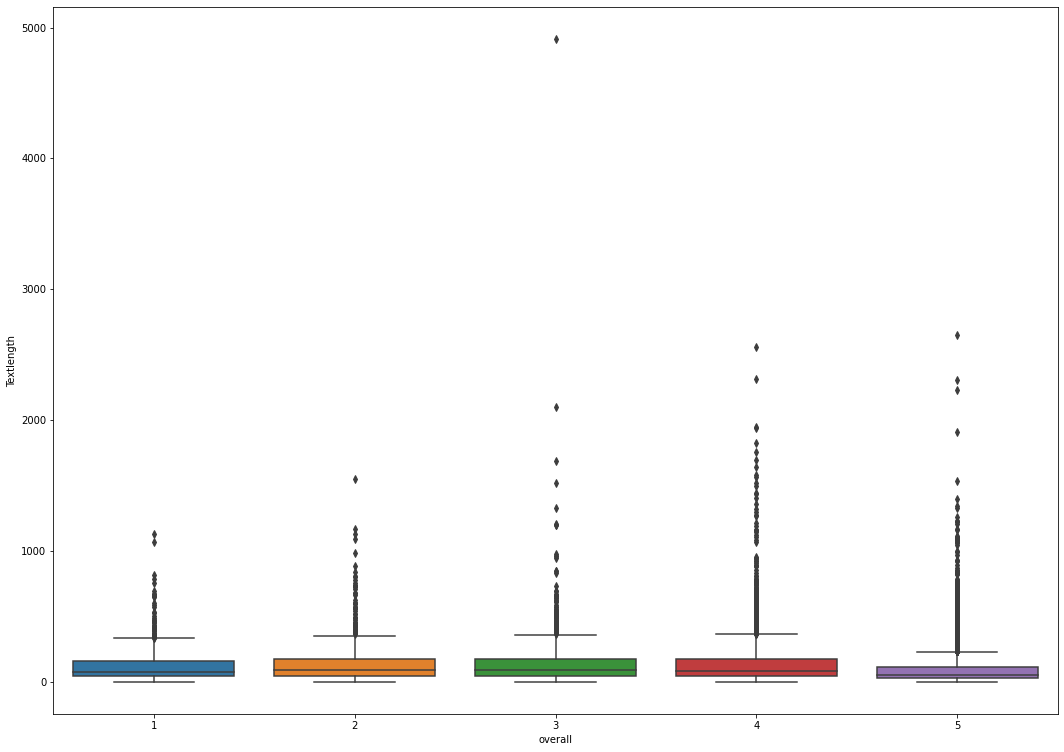

In [25]:
plt.figure(figsize = (18,13))
sns.boxplot(x = 'overall', y = 'Textlength', data = df);

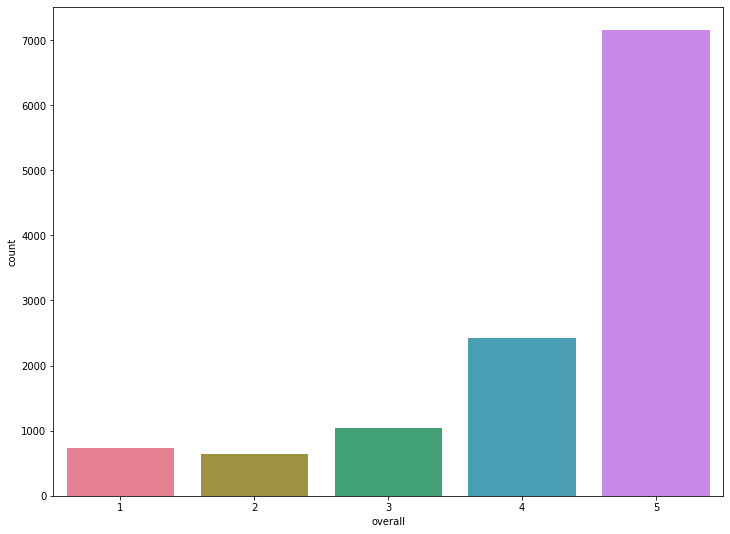

In [26]:
plt.figure(figsize = (12,9))
sns.countplot('overall', data = df, palette="husl");

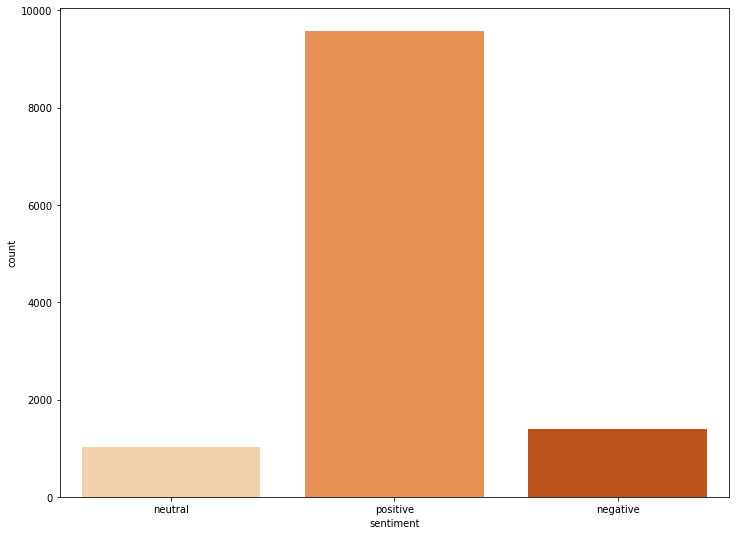

In [27]:
plt.figure(figsize = (12,9))
sns.countplot('sentiment', data = df, palette="Oranges");

In [28]:
df.groupby('sentiment').mean().corr()

overall  Textlength
overall     1.000000   -0.609506
Textlength -0.609506    1.000000

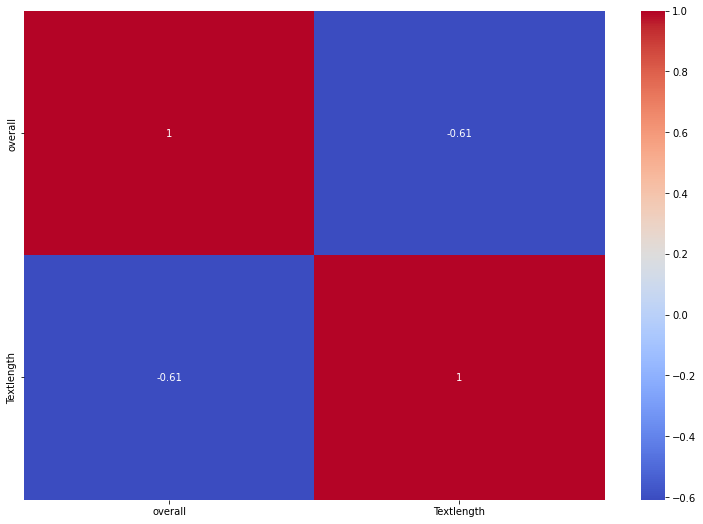

In [29]:
plt.figure(figsize = (13,9))
sns.heatmap(df.groupby('sentiment').mean().corr(), cmap = "coolwarm", annot=True)

In [30]:
df.reset_index(drop=True, inplace=True)

In [31]:
df.head(12)

reviewerID        asin       reviewerName helpful  \
0   A3M7JD51RIFPNL  B00892RUTA        Tony Ibarra  [0, 0]   
1   A3S5EXYZDEBF3K  B0041OSQ9I       Brian Morris  [3, 3]   
2   A2EK78B8JYIND3  B003NYQHFW                 DS  [0, 0]   
3   A3CO04R4N5R1E9  B0029LDDPM     David Henchman  [0, 0]   
4   A1A0JA47QHWHLZ  B00AGOSQI8                Rob  [0, 0]   
5    A4JZOZEZ8NLUA  B001NIEK3Q               Diva  [0, 0]   
6   A3RACIXI8CK305  B0071BTJPI                Ken  [0, 0]   
7    A8WMVITPT6NP7  B00D02AG7C  Richard S. Teeple  [1, 1]   
8    A6YA25TZ6IDWH  B001QUA6RA              Scott  [0, 0]   
9    ASK5AZ868YAY9  B00316263Y         M. Canning  [0, 0]   
10  A2Q2GAHH5XGJ2T  B002UNFVK4           TBoneJPH  [0, 0]   
11  A3756PRIE96H7J  B006QB1RPY          S. Jordan  [5, 9]   

                                           reviewText  overall  \
0   I made it work.  It was to long so I had to cu...        3   
1   I'm very excited to receive this small USB 3.0...        5   
2   The battery ran fine until it's one year warra...        2   
3   I started with a Legend Cx, moved up to the Da...        5   
4   To start I have never flew an RC anything befo...        4   
5   I use this on the big screen tv, my desktop, l...        5   
6   I tried keeping this device in light to keep i...        2   
7   pretty cool little device. didnt think i would...        4   
8   I have 3 of these TRENDnet 8-port gigabit swit...        5   
9   This is a quality cable. You can go to one of ...        5   
10  I bought this to run a home theater.  It was p...        3   
11  I purchased this router to upgrade my home net...        2   

                                              summary unixReviewTime  \
0                            Good solid ceiling mount     10-02-2013   
1   No driver installs and no auto bloatware -- WO...     11-24-2010   
2                      Does not function after a year     09-04-2012   
3                                      Upgraded again     01-03-2014   
4                                 Not too hard to fly     03-09-2014   
5                        Works well on 3D glasses too     02-14-2013   
6                                Battery Died already     01-02-2014   
7                                                 tab     02-18-2014   
8                              Great, reliable switch     02-15-2012   
9                               BlueRigger HDMI Cable     10-12-2010   
10                          Loved it...until it broke     07-19-2013   
11  Serious documentation, feature and firmware is...     08-24-2012   

   sentiment  Textlength  
0    neutral          49  
1   positive         261  
2   negative          54  
3   positive          35  
4   positive         166  
5   positive          24  
6   negative          69  
7   positive          26  
8   positive         275  
9   positive         110  
10   neutral          47  
11  negative         457

In [32]:
df[['reviewText']]

reviewText
0      I made it work.  It was to long so I had to cu...
1      I'm very excited to receive this small USB 3.0...
2      The battery ran fine until it's one year warra...
3      I started with a Legend Cx, moved up to the Da...
4      To start I have never flew an RC anything befo...
...                                                  ...
11995  This protects your Garmin GPS very well. I do ...
11996  Great accessories for my Kindle.  Now I have e...
11997  I like every aspect of this keyboard and mouse...
11998  I tried pairing this mouse/speaker (fully char...
11999  It works so well, easy to use, quick charge, c...

[12000 rows x 1 columns]

In [33]:
df.shape

(12000, 10)

In [34]:
df.overall.unique()

array([3, 5, 2, 4, 1])

In [35]:
df.overall.value_counts()

5    7157
4    2424
3    1034
1     738
2     647
Name: overall, dtype: int64

In [36]:
df.head(10)

reviewerID        asin       reviewerName helpful  \
0  A3M7JD51RIFPNL  B00892RUTA        Tony Ibarra  [0, 0]   
1  A3S5EXYZDEBF3K  B0041OSQ9I       Brian Morris  [3, 3]   
2  A2EK78B8JYIND3  B003NYQHFW                 DS  [0, 0]   
3  A3CO04R4N5R1E9  B0029LDDPM     David Henchman  [0, 0]   
4  A1A0JA47QHWHLZ  B00AGOSQI8                Rob  [0, 0]   
5   A4JZOZEZ8NLUA  B001NIEK3Q               Diva  [0, 0]   
6  A3RACIXI8CK305  B0071BTJPI                Ken  [0, 0]   
7   A8WMVITPT6NP7  B00D02AG7C  Richard S. Teeple  [1, 1]   
8   A6YA25TZ6IDWH  B001QUA6RA              Scott  [0, 0]   
9   ASK5AZ868YAY9  B00316263Y         M. Canning  [0, 0]   

                                          reviewText  overall  \
0  I made it work.  It was to long so I had to cu...        3   
1  I'm very excited to receive this small USB 3.0...        5   
2  The battery ran fine until it's one year warra...        2   
3  I started with a Legend Cx, moved up to the Da...        5   
4  To start I have never flew an RC anything befo...        4   
5  I use this on the big screen tv, my desktop, l...        5   
6  I tried keeping this device in light to keep i...        2   
7  pretty cool little device. didnt think i would...        4   
8  I have 3 of these TRENDnet 8-port gigabit swit...        5   
9  This is a quality cable. You can go to one of ...        5   

                                             summary unixReviewTime sentiment  \
0                           Good solid ceiling mount     10-02-2013   neutral   
1  No driver installs and no auto bloatware -- WO...     11-24-2010  positive   
2                     Does not function after a year     09-04-2012  negative   
3                                     Upgraded again     01-03-2014  positive   
4                                Not too hard to fly     03-09-2014  positive   
5                       Works well on 3D glasses too     02-14-2013  positive   
6                               Battery Died already     01-02-2014  negative   
7                                                tab     02-18-2014  positive   
8                             Great, reliable switch     02-15-2012  positive   
9                              BlueRigger HDMI Cable     10-12-2010  positive   

   Textlength  
0          49  
1         261  
2          54  
3          35  
4         166  
5          24  
6          69  
7          26  
8         275  
9         110

In [37]:
df_date = pd.to_datetime(df['unixReviewTime']).to_frame() 
df_date  # formatting the date 

unixReviewTime
0         2013-10-02
1         2010-11-24
2         2012-09-04
3         2014-01-03
4         2014-03-09
...              ...
11995     2012-12-16
11996     2010-07-29
11997     2011-07-30
11998     2013-09-15
11999     2012-07-25

[12000 rows x 1 columns]

In [38]:
df['date'] = df_date
df['date']

0       2013-10-02
1       2010-11-24
2       2012-09-04
3       2014-01-03
4       2014-03-09
           ...    
11995   2012-12-16
11996   2010-07-29
11997   2011-07-30
11998   2013-09-15
11999   2012-07-25
Name: date, Length: 12000, dtype: datetime64[ns]

In [39]:
Year = df["date"].dt.year 
Month = df["date"].dt.month
df['Year'] = Year # adding new column to dataframe
df['Month'] = Month # adding new column to dataframe
df

reviewerID        asin             reviewerName helpful  \
0      A3M7JD51RIFPNL  B00892RUTA              Tony Ibarra  [0, 0]   
1      A3S5EXYZDEBF3K  B0041OSQ9I             Brian Morris  [3, 3]   
2      A2EK78B8JYIND3  B003NYQHFW                       DS  [0, 0]   
3      A3CO04R4N5R1E9  B0029LDDPM           David Henchman  [0, 0]   
4      A1A0JA47QHWHLZ  B00AGOSQI8                      Rob  [0, 0]   
...               ...         ...                      ...     ...   
11995  A19WY32CIFRHVC  B001QKZ3OQ                R. Basile  [0, 0]   
11996   AOZ2XJ992KTU4  B001UFVT22                   Bonnie  [0, 0]   
11997  A12HP7HJIZHQUG  B003VANO7C  SigmaSpace "SigmaSpace"  [0, 0]   
11998  A20UU20K7M9ZPF  B00DN27H58                   k_tree  [1, 2]   
11999  A2PHHB4AP5ZZFS  B00189JVCA                     Keng  [0, 0]   

                                              reviewText  overall  \
0      I made it work.  It was to long so I had to cu...        3   
1      I'm very excited to receive this small USB 3.0...        5   
2      The battery ran fine until it's one year warra...        2   
3      I started with a Legend Cx, moved up to the Da...        5   
4      To start I have never flew an RC anything befo...        4   
...                                                  ...      ...   
11995  This protects your Garmin GPS very well. I do ...        4   
11996  Great accessories for my Kindle.  Now I have e...        5   
11997  I like every aspect of this keyboard and mouse...        5   
11998  I tried pairing this mouse/speaker (fully char...        1   
11999  It works so well, easy to use, quick charge, c...        5   

                                                 summary unixReviewTime  \
0                               Good solid ceiling mount     10-02-2013   
1      No driver installs and no auto bloatware -- WO...     11-24-2010   
2                         Does not function after a year     09-04-2012   
3                                         Upgraded again     01-03-2014   
4                                    Not too hard to fly     03-09-2014   
...                                                  ...            ...   
11995                                      Nice and hard     12-16-2012   
11996                                 Kindle accessories     07-29-2010   
11997                                  Terrific keyboard     07-30-2011   
11998               Will Not Pair With Bluetooth Device.     09-15-2013   
11999                                 highly recommended     07-25-2012   

      sentiment  Textlength       date  Year  Month  
0       neutral          49 2013-10-02  2013     10  
1      positive         261 2010-11-24  2010     11  
2      negative          54 2012-09-04  2012      9  
3      positive          35 2014-01-03  2014      1  
4      positive         166 2014-03-09  2014      3  
...         ...         ...        ...   ...    ...  
11995  positive          24 2012-12-16  2012     12  
11996  positive          15 2010-07-29  2010      7  
11997  positive          43 2011-07-30  2011      7  
11998  negative          23 2013-09-15  2013      9  
11999  positive          38 2012-07-25  2012      7  

[12000 rows x 13 columns]

In [40]:
df['reviewText']=df['reviewText'].str.lower()  #Butun sutunu küçük harfe çevirir.
df['reviewText']=df['reviewText'].str.replace('[^\w\s]','') #Noktalama işaretlerini kaldırır
df['reviewText']=df['reviewText'].str.replace('\d+','')   #Rakamları kaldırır.
df['reviewText']=df['reviewText'].str.replace('\n',' ')  #Yeni satırları kaldır.
df['reviewText']=df['reviewText'].str.replace('\r','')#Enter i kaldır

In [41]:
new_df= df[['overall', 'sentiment','reviewText']]

In [42]:
!pip install langdetect
#installing the library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
from PIL import Image  
from wordcloud import WordCloud, STOPWORDS
import numpy as np

In [44]:
text_5_star=df.query('overall>3')['reviewText']
text_5_star

1        im very excited to receive this small usb  dri...
3        i started with a legend cx moved up to the dak...
4        to start i have never flew an rc anything befo...
5        i use this on the big screen tv my desktop lap...
7        pretty cool little device didnt think i would ...
                               ...                        
11994    this was a replacement for a  year old acer th...
11995    this protects your garmin gps very well i do w...
11996    great accessories for my kindle  now i have ev...
11997    i like every aspect of this keyboard and mouse...
11999    it works so well easy to use quick charge chea...
Name: reviewText, Length: 9581, dtype: object

In [45]:
text_1_star= df.query('overall<3')['reviewText']
text_1_star

2        the battery ran fine until its one year warran...
6        i tried keeping this device in light to keep i...
11       i purchased this router to upgrade my home net...
13       i got a camera lockup and error message after ...
14       negatives  there is no lineout port so you can...
                               ...                        
11943    dont know why but every time i play a bluray r...
11956    arghsilly me for not reading the fine print  i...
11958    pay close attention to the model of what youre...
11992    this is my second failure  i cannot recommend ...
11998    i tried pairing this mousespeaker fully charge...
Name: reviewText, Length: 1385, dtype: object

In [46]:
text_5_star=new_df[new_df['overall']>3]
text_5_star

overall sentiment                                         reviewText
1            5  positive  im very excited to receive this small usb  dri...
3            5  positive  i started with a legend cx moved up to the dak...
4            4  positive  to start i have never flew an rc anything befo...
5            5  positive  i use this on the big screen tv my desktop lap...
7            4  positive  pretty cool little device didnt think i would ...
...        ...       ...                                                ...
11994        4  positive  this was a replacement for a  year old acer th...
11995        4  positive  this protects your garmin gps very well i do w...
11996        5  positive  great accessories for my kindle  now i have ev...
11997        5  positive  i like every aspect of this keyboard and mouse...
11999        5  positive  it works so well easy to use quick charge chea...

[9581 rows x 3 columns]

In [47]:
text_5_star_review = " ".join(review for review in text_5_star.reviewText)


In [48]:
text_5_star_review

'im very excited to receive this small usb  drive in order to more to the next generation of speedunboxingit is a nice shiny black hard drive with dull black edges which makes it look classy  it has a short usb  cable includedinstallationi plugged it into my dell optiplex  with a usb  card and in windows xp it almost instantly popped up the autoplay window with a drive letter  congratulations wd no driver installation  there are some folders and exes on the drive but it looks as though they are not autoplayed  thankfully  as with all hard drive makers they dont tell the whole truth about the size you must read the fine print it is actually  gb which is  bytes it is not factors of ten in this systemspeedthis is not a scientific or accurate measurement of speed so consider it anecdotal  in windows xp i transferred gb  files and it took   i then removed it safely and switched it to usb   windows  xp gave a nice message informing me that it would be much better in a usb  port  it recognize

In [49]:
text_1_star=new_df[new_df['overall']<3]
text_1_star

overall sentiment                                         reviewText
2            2  negative  the battery ran fine until its one year warran...
6            2  negative  i tried keeping this device in light to keep i...
11           2  negative  i purchased this router to upgrade my home net...
13           2  negative  i got a camera lockup and error message after ...
14           2  negative  negatives  there is no lineout port so you can...
...        ...       ...                                                ...
11943        2  negative  dont know why but every time i play a bluray r...
11956        2  negative  arghsilly me for not reading the fine print  i...
11958        2  negative  pay close attention to the model of what youre...
11992        1  negative  this is my second failure  i cannot recommend ...
11998        1  negative  i tried pairing this mousespeaker fully charge...

[1385 rows x 3 columns]

In [50]:
text_1_star_review = " ".join(review for review in text_1_star.reviewText)
text_1_star_review

'the battery ran fine until its one year warranty and as soon as the warranty was over it stopped workingnow ive to keep my laptop connected to the charging point all the time and have ordered for another batteryi would rather buy cheaper battery if they are supposed to function only for a year i tried keeping this device in light to keep it charged  once the summer months passed i forgot about it  now in order for me to get it to work i have to buy another battery  yes it tells you to take the battery out if your not using it for awhile but i just forgot and now i have an emergency radio that wont turn on at all i purchased this router to upgrade my home network based on excellent user reviews  my own home network situation includes voip and since my family does a lot of video streaming qos is a necessary feature to ensure our phone connections dont stutter  my previous router a dlink dir served us ably for a long time until it started showing signs of age  so i got this one set it up

In [51]:
positive_text=new_df.query("sentiment=='positive'")['reviewText']
positive_text

1        im very excited to receive this small usb  dri...
3        i started with a legend cx moved up to the dak...
4        to start i have never flew an rc anything befo...
5        i use this on the big screen tv my desktop lap...
7        pretty cool little device didnt think i would ...
                               ...                        
11994    this was a replacement for a  year old acer th...
11995    this protects your garmin gps very well i do w...
11996    great accessories for my kindle  now i have ev...
11997    i like every aspect of this keyboard and mouse...
11999    it works so well easy to use quick charge chea...
Name: reviewText, Length: 9581, dtype: object

In [52]:
negative_text=new_df.query("sentiment=='negative'")['reviewText']

In [53]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
from nltk.tokenize import word_tokenize
new_df['reviewText']=new_df['reviewText'].str.replace('[^a-zA-Z]',' ')
new_df['clean_text'] = new_df['reviewText'].apply(lambda x: nltk.word_tokenize(x) ) 
new_df

overall sentiment                                         reviewText  \
0            3   neutral  i made it work  it was to long so i had to cut...   
1            5  positive  im very excited to receive this small usb  dri...   
2            2  negative  the battery ran fine until its one year warran...   
3            5  positive  i started with a legend cx moved up to the dak...   
4            4  positive  to start i have never flew an rc anything befo...   
...        ...       ...                                                ...   
11995        4  positive  this protects your garmin gps very well i do w...   
11996        5  positive  great accessories for my kindle  now i have ev...   
11997        5  positive  i like every aspect of this keyboard and mouse...   
11998        1  negative  i tried pairing this mousespeaker fully charge...   
11999        5  positive  it works so well easy to use quick charge chea...   

                                              clean_text  
0      [i, made, it, work, it, was, to, long, so, i, ...  
1      [im, very, excited, to, receive, this, small, ...  
2      [the, battery, ran, fine, until, its, one, yea...  
3      [i, started, with, a, legend, cx, moved, up, t...  
4      [to, start, i, have, never, flew, an, rc, anyt...  
...                                                  ...  
11995  [this, protects, your, garmin, gps, very, well...  
11996  [great, accessories, for, my, kindle, now, i, ...  
11997  [i, like, every, aspect, of, this, keyboard, a...  
11998  [i, tried, pairing, this, mousespeaker, fully,...  
11999  [it, works, so, well, easy, to, use, quick, ch...  

[12000 rows x 4 columns]

In [55]:
import nltk
from nltk.corpus import stopwords  
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
new_df['nonstop'] = new_df['clean_text'].apply(lambda x:[j for j  in x if j not in stopwords])
new_df.head(12)

#word yerine j  text yerine x yazılabilir for döngüsnde

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


overall sentiment                                         reviewText  \
0         3   neutral  i made it work  it was to long so i had to cut...   
1         5  positive  im very excited to receive this small usb  dri...   
2         2  negative  the battery ran fine until its one year warran...   
3         5  positive  i started with a legend cx moved up to the dak...   
4         4  positive  to start i have never flew an rc anything befo...   
5         5  positive  i use this on the big screen tv my desktop lap...   
6         2  negative  i tried keeping this device in light to keep i...   
7         4  positive  pretty cool little device didnt think i would ...   
8         5  positive  i have  of these trendnet port gigabit switche...   
9         5  positive  this is a quality cable you can go to one of t...   
10        3   neutral  i bought this to run a home theater  it was pe...   
11        2  negative  i purchased this router to upgrade my home net...   

                                           clean_text  \
0   [i, made, it, work, it, was, to, long, so, i, ...   
1   [im, very, excited, to, receive, this, small, ...   
2   [the, battery, ran, fine, until, its, one, yea...   
3   [i, started, with, a, legend, cx, moved, up, t...   
4   [to, start, i, have, never, flew, an, rc, anyt...   
5   [i, use, this, on, the, big, screen, tv, my, d...   
6   [i, tried, keeping, this, device, in, light, t...   
7   [pretty, cool, little, device, didnt, think, i...   
8   [i, have, of, these, trendnet, port, gigabit, ...   
9   [this, is, a, quality, cable, you, can, go, to...   
10  [i, bought, this, to, run, a, home, theater, i...   
11  [i, purchased, this, router, to, upgrade, my, ...   

                                              nonstop  
0   [made, work, long, cut, hacksaw, end, looks, g...  
1   [im, excited, receive, small, usb, drive, orde...  
2   [battery, ran, fine, one, year, warranty, soon...  
3   [started, legend, cx, moved, dakota, one, like...  
4   [start, never, flew, rc, anything, going, onli...  
5   [use, big, screen, tv, desktop, laptop, glasse...  
6   [tried, keeping, device, light, keep, charged,...  
7   [pretty, cool, little, device, didnt, think, w...  
8   [trendnet, port, gigabit, switches, used, heav...  
9   [quality, cable, go, one, big, stores, spend, ...  
10  [bought, run, home, theater, perfect, year, st...  
11  [purchased, router, upgrade, home, network, ba...

In [56]:
from nltk.stem.porter import PorterStemmer
stemmer_output = nltk.PorterStemmer()

new_df['stemmed'] = new_df['nonstop'].apply(lambda x:[stemmer_output.stem(j) for j in x])

new_df.head(12)

overall sentiment                                         reviewText  \
0         3   neutral  i made it work  it was to long so i had to cut...   
1         5  positive  im very excited to receive this small usb  dri...   
2         2  negative  the battery ran fine until its one year warran...   
3         5  positive  i started with a legend cx moved up to the dak...   
4         4  positive  to start i have never flew an rc anything befo...   
5         5  positive  i use this on the big screen tv my desktop lap...   
6         2  negative  i tried keeping this device in light to keep i...   
7         4  positive  pretty cool little device didnt think i would ...   
8         5  positive  i have  of these trendnet port gigabit switche...   
9         5  positive  this is a quality cable you can go to one of t...   
10        3   neutral  i bought this to run a home theater  it was pe...   
11        2  negative  i purchased this router to upgrade my home net...   

                                           clean_text  \
0   [i, made, it, work, it, was, to, long, so, i, ...   
1   [im, very, excited, to, receive, this, small, ...   
2   [the, battery, ran, fine, until, its, one, yea...   
3   [i, started, with, a, legend, cx, moved, up, t...   
4   [to, start, i, have, never, flew, an, rc, anyt...   
5   [i, use, this, on, the, big, screen, tv, my, d...   
6   [i, tried, keeping, this, device, in, light, t...   
7   [pretty, cool, little, device, didnt, think, i...   
8   [i, have, of, these, trendnet, port, gigabit, ...   
9   [this, is, a, quality, cable, you, can, go, to...   
10  [i, bought, this, to, run, a, home, theater, i...   
11  [i, purchased, this, router, to, upgrade, my, ...   

                                              nonstop  \
0   [made, work, long, cut, hacksaw, end, looks, g...   
1   [im, excited, receive, small, usb, drive, orde...   
2   [battery, ran, fine, one, year, warranty, soon...   
3   [started, legend, cx, moved, dakota, one, like...   
4   [start, never, flew, rc, anything, going, onli...   
5   [use, big, screen, tv, desktop, laptop, glasse...   
6   [tried, keeping, device, light, keep, charged,...   
7   [pretty, cool, little, device, didnt, think, w...   
8   [trendnet, port, gigabit, switches, used, heav...   
9   [quality, cable, go, one, big, stores, spend, ...   
10  [bought, run, home, theater, perfect, year, st...   
11  [purchased, router, upgrade, home, network, ba...   

                                              stemmed  
0   [made, work, long, cut, hacksaw, end, look, gr...  
1   [im, excit, receiv, small, usb, drive, order, ...  
2   [batteri, ran, fine, one, year, warranti, soon...  
3   [start, legend, cx, move, dakota, one, like, s...  
4   [start, never, flew, rc, anyth, go, onlin, fin...  
5   [use, big, screen, tv, desktop, laptop, glass,...  
6   [tri, keep, devic, light, keep, charg, summer,...  
7   [pretti, cool, littl, devic, didnt, think, wou...  
8   [trendnet, port, gigabit, switch, use, heavily...  
9   [qualiti, cabl, go, one, big, store, spend, wh...  
10  [bought, run, home, theater, perfect, year, st...  
11  [purchas, router, upgrad, home, network, base,...

In [57]:
import nltk
nltk.download('all')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer_output= WordNetLemmatizer()

new_df['lemmatized'] = new_df['nonstop'].apply(lambda x: [lemmatizer_output.lemmatize(j) for j in x if j not in stopwords])
new_df.head(12)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

overall sentiment                                         reviewText  \
0         3   neutral  i made it work  it was to long so i had to cut...   
1         5  positive  im very excited to receive this small usb  dri...   
2         2  negative  the battery ran fine until its one year warran...   
3         5  positive  i started with a legend cx moved up to the dak...   
4         4  positive  to start i have never flew an rc anything befo...   
5         5  positive  i use this on the big screen tv my desktop lap...   
6         2  negative  i tried keeping this device in light to keep i...   
7         4  positive  pretty cool little device didnt think i would ...   
8         5  positive  i have  of these trendnet port gigabit switche...   
9         5  positive  this is a quality cable you can go to one of t...   
10        3   neutral  i bought this to run a home theater  it was pe...   
11        2  negative  i purchased this router to upgrade my home net...   

                                           clean_text  \
0   [i, made, it, work, it, was, to, long, so, i, ...   
1   [im, very, excited, to, receive, this, small, ...   
2   [the, battery, ran, fine, until, its, one, yea...   
3   [i, started, with, a, legend, cx, moved, up, t...   
4   [to, start, i, have, never, flew, an, rc, anyt...   
5   [i, use, this, on, the, big, screen, tv, my, d...   
6   [i, tried, keeping, this, device, in, light, t...   
7   [pretty, cool, little, device, didnt, think, i...   
8   [i, have, of, these, trendnet, port, gigabit, ...   
9   [this, is, a, quality, cable, you, can, go, to...   
10  [i, bought, this, to, run, a, home, theater, i...   
11  [i, purchased, this, router, to, upgrade, my, ...   

                                              nonstop  \
0   [made, work, long, cut, hacksaw, end, looks, g...   
1   [im, excited, receive, small, usb, drive, orde...   
2   [battery, ran, fine, one, year, warranty, soon...   
3   [started, legend, cx, moved, dakota, one, like...   
4   [start, never, flew, rc, anything, going, onli...   
5   [use, big, screen, tv, desktop, laptop, glasse...   
6   [tried, keeping, device, light, keep, charged,...   
7   [pretty, cool, little, device, didnt, think, w...   
8   [trendnet, port, gigabit, switches, used, heav...   
9   [quality, cable, go, one, big, stores, spend, ...   
10  [bought, run, home, theater, perfect, year, st...   
11  [purchased, router, upgrade, home, network, ba...   

                                              stemmed  \
0   [made, work, long, cut, hacksaw, end, look, gr...   
1   [im, excit, receiv, small, usb, drive, order, ...   
2   [batteri, ran, fine, one, year, warranti, soon...   
3   [start, legend, cx, move, dakota, one, like, s...   
4   [start, never, flew, rc, anyth, go, onlin, fin...   
5   [use, big, screen, tv, desktop, laptop, glass,...   
6   [tri, keep, devic, light, keep, charg, summer,...   
7   [pretti, cool, littl, devic, didnt, think, wou...   
8   [trendnet, port, gigabit, switch, use, heavily...   
9   [qualiti, cabl, go, one, big, store, spend, wh...   
10  [bought, run, home, theater, perfect, year, st...   
11  [purchas, router, upgrad, home, network, base,...   

                                           lemmatized  
0   [made, work, long, cut, hacksaw, end, look, gr...  
1   [im, excited, receive, small, usb, drive, orde...  
2   [battery, ran, fine, one, year, warranty, soon...  
3   [started, legend, cx, moved, dakota, one, like...  
4   [start, never, flew, rc, anything, going, onli...  
5   [use, big, screen, tv, desktop, laptop, glass,...  
6   [tried, keeping, device, light, keep, charged,...  
7   [pretty, cool, little, device, didnt, think, w...  
8   [trendnet, port, gigabit, switch, used, heavil...  
9   [quality, cable, go, one, big, store, spend, w...  
10  [bought, run, home, theater, perfect, year, st...  
11  [purchased, router, upgrade, home, network, ba...

In [58]:
new_df['cleaned_text'] = new_df['lemmatized'].apply(lambda x: ' '.join(x) )

In [59]:
new_df

overall sentiment                                         reviewText  \
0            3   neutral  i made it work  it was to long so i had to cut...   
1            5  positive  im very excited to receive this small usb  dri...   
2            2  negative  the battery ran fine until its one year warran...   
3            5  positive  i started with a legend cx moved up to the dak...   
4            4  positive  to start i have never flew an rc anything befo...   
...        ...       ...                                                ...   
11995        4  positive  this protects your garmin gps very well i do w...   
11996        5  positive  great accessories for my kindle  now i have ev...   
11997        5  positive  i like every aspect of this keyboard and mouse...   
11998        1  negative  i tried pairing this mousespeaker fully charge...   
11999        5  positive  it works so well easy to use quick charge chea...   

                                              clean_text  \
0      [i, made, it, work, it, was, to, long, so, i, ...   
1      [im, very, excited, to, receive, this, small, ...   
2      [the, battery, ran, fine, until, its, one, yea...   
3      [i, started, with, a, legend, cx, moved, up, t...   
4      [to, start, i, have, never, flew, an, rc, anyt...   
...                                                  ...   
11995  [this, protects, your, garmin, gps, very, well...   
11996  [great, accessories, for, my, kindle, now, i, ...   
11997  [i, like, every, aspect, of, this, keyboard, a...   
11998  [i, tried, pairing, this, mousespeaker, fully,...   
11999  [it, works, so, well, easy, to, use, quick, ch...   

                                                 nonstop  \
0      [made, work, long, cut, hacksaw, end, looks, g...   
1      [im, excited, receive, small, usb, drive, orde...   
2      [battery, ran, fine, one, year, warranty, soon...   
3      [started, legend, cx, moved, dakota, one, like...   
4      [start, never, flew, rc, anything, going, onli...   
...                                                  ...   
11995  [protects, garmin, gps, well, wish, theyd, all...   
11996  [great, accessories, kindle, everthing, keep, ...   
11997  [like, every, aspect, keyboard, mouse, combina...   
11998  [tried, pairing, mousespeaker, fully, charged,...   
11999  [works, well, easy, use, quick, charge, cheape...   

                                                 stemmed  \
0      [made, work, long, cut, hacksaw, end, look, gr...   
1      [im, excit, receiv, small, usb, drive, order, ...   
2      [batteri, ran, fine, one, year, warranti, soon...   
3      [start, legend, cx, move, dakota, one, like, s...   
4      [start, never, flew, rc, anyth, go, onlin, fin...   
...                                                  ...   
11995  [protect, garmin, gp, well, wish, theyd, allow...   
11996  [great, accessori, kindl, everth, keep, read, ...   
11997  [like, everi, aspect, keyboard, mous, combin, ...   
11998  [tri, pair, mousespeak, fulli, charg, sever, b...   
11999  [work, well, easi, use, quick, charg, cheaper,...   

                                              lemmatized  \
0      [made, work, long, cut, hacksaw, end, look, gr...   
1      [im, excited, receive, small, usb, drive, orde...   
2      [battery, ran, fine, one, year, warranty, soon...   
3      [started, legend, cx, moved, dakota, one, like...   
4      [start, never, flew, rc, anything, going, onli...   
...                                                  ...   
11995  [protects, garmin, gps, well, wish, theyd, all...   
11996  [great, accessory, kindle, everthing, keep, re...   
11997  [like, every, aspect, keyboard, mouse, combina...   
11998  [tried, pairing, mousespeaker, fully, charged,...   
11999  [work, well, easy, use, quick, charge, cheaper...   

                                            cleaned_text  
0      made work long cut hacksaw end look great lot ...  
1      im excited receive small usb drive order next ...

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [61]:
x=new_df.cleaned_text #assign cleaned_text column to variable x 
y=new_df.sentiment #assign sentiment column to variable y

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42, test_size=.20)


In [63]:
vect=CountVectorizer(lowercase=True, stop_words="english", ngram_range=(1,1))

# vect=CountVectorizer(lowercase=True, stop_words="english")
# ingilizce gereksiz kelimeleri kaldırdı.

# accurarcy arttırmak için ngram ekledik. 
# ngram bir kelimenin farklı anlamlarına bakmak demek.

In [64]:
x_train_dtm= vect.fit_transform(x_train) 

#Call the fit_transform() function in order to learn a vocabulary from a document and transform it to a vector.

print(x_train_dtm)

x_test_dtm=vect.transform(x_test)

  (0, 13916)	1
  (0, 29382)	1
  (0, 5673)	1
  (0, 18432)	1
  (0, 33564)	1
  (0, 10630)	1
  (0, 31905)	1
  (0, 28365)	1
  (0, 17594)	1
  (0, 3951)	1
  (0, 10556)	1
  (0, 2214)	1
  (0, 22787)	1
  (0, 12034)	1
  (0, 6972)	1
  (1, 10630)	1
  (1, 2214)	1
  (1, 8876)	2
  (1, 14467)	1
  (1, 22023)	1
  (1, 21908)	1
  (1, 5388)	1
  (1, 27341)	2
  (1, 17196)	1
  (1, 28333)	1
  :	:
  (9599, 24838)	1
  (9599, 21330)	1
  (9599, 15870)	1
  (9599, 3663)	2
  (9599, 29090)	5
  (9599, 28018)	1
  (9599, 28960)	1
  (9599, 31525)	1
  (9599, 26107)	1
  (9599, 14875)	1
  (9599, 9455)	12
  (9599, 24271)	1
  (9599, 11186)	1
  (9599, 15834)	1
  (9599, 26492)	1
  (9599, 14876)	1
  (9599, 18207)	1
  (9599, 23052)	1
  (9599, 21690)	1
  (9599, 13755)	1
  (9599, 15833)	1
  (9599, 12570)	2
  (9599, 13619)	1
  (9599, 10866)	1
  (9599, 27499)	1


In [65]:
'''x=vect.fit_transform(x)  #x'in yeni hali vektörize edilmiş halidir.'''

"x=vect.fit_transform(x)  #x'in yeni hali vektörize edilmiş halidir."

In [66]:
tf=pd.DataFrame(x_train_dtm.toarray(),columns=vect.get_feature_names())
tf.head()

aa  aaa  aaaaa  aaaaaaaaaaaaaaaaaaaaaaaaaarghfor  aaaaaamazing  aac  \
0   0    0      0                                 0             0    0   
1   0    0      0                                 0             0    0   
2   0    0      0                                 0             0    0   
3   0    0      0                                 0             0    0   
4   0    0      0                                 0             0    0   

   aacstyle  aalong  aandft  aape  ...  zune  zunes  zuneso  zvox  zwave  zx  \
0         0       0       0     0  ...     0      0       0     0      0   0   
1         0       0       0     0  ...     0      0       0     0      0   0   
2         0       0       0     0  ...     0      0       0     0      0   0   
3         0       0       0     0  ...     0      0       0     0      0   0   
4         0       0       0     0  ...     0      0       0     0      0   0   

   zxi  zxthe  zxup  zyxel  
0    0      0     0      0  
1    0      0     0      0  
2    0      0     0      0  
3    0      0     0      0  
4    0      0     0      0  

[5 rows x 34288 columns]

In [67]:
from sklearn.naive_bayes import MultinomialNB 
mnb=MultinomialNB()

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
tahmin=mnb.fit(x_train_dtm,y_train).predict(x_test_dtm)

In [69]:
tahmin=mnb.fit(x_train_dtm,y_train).predict(x_test_dtm)

In [70]:
confusion_matrix(tahmin,y_test)

array([[  38,   10,    9],
       [   0,    0,    1],
       [ 239,  206, 1897]])

In [71]:
print(classification_report(tahmin,y_test))

              precision    recall  f1-score   support

    negative       0.14      0.67      0.23        57
     neutral       0.00      0.00      0.00         1
    positive       0.99      0.81      0.89      2342

    accuracy                           0.81      2400
   macro avg       0.38      0.49      0.37      2400
weighted avg       0.97      0.81      0.88      2400



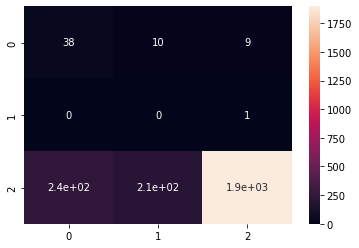

In [72]:
sns.heatmap(confusion_matrix(tahmin,y_test),annot=True)

In [73]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

In [74]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

In [75]:
tahmin2=r.fit(x_train_dtm,y_train).predict(x_test_dtm)
tahmin3=d.fit(x_train_dtm,y_train).predict(x_test_dtm)

In [76]:
print(classification_report(tahmin2,y_test))

              precision    recall  f1-score   support

    negative       0.11      0.84      0.20        37
     neutral       0.00      0.00      0.00         0
    positive       1.00      0.80      0.89      2363

    accuracy                           0.81      2400
   macro avg       0.37      0.55      0.36      2400
weighted avg       0.98      0.81      0.88      2400



In [77]:
print(classification_report(tahmin3,y_test))

              precision    recall  f1-score   support

    negative       0.32      0.34      0.33       258
     neutral       0.09      0.14      0.11       143
    positive       0.88      0.84      0.86      1999

    accuracy                           0.75      2400
   macro avg       0.43      0.44      0.43      2400
weighted avg       0.77      0.75      0.76      2400



In [78]:
l=LogisticRegression()

In [79]:
l.fit(x_train_dtm,y_train)

LogisticRegression()

In [80]:
tahmin4=l.predict(x_test_dtm)

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy_score(tahmin4,y_test)

0.8145833333333333

In [83]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()

In [84]:
abc.fit(x_train_dtm,y_train)

AdaBoostClassifier()

In [85]:
tahmin5=abc.predict(x_test_dtm)

In [86]:
accuracy_score(tahmin5,y_test)

0.8133333333333334

In [87]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [88]:
n2_bigrams = get_top_n_gram(new_df['reviewText'],(2,2),20)
n3_bigrams = get_top_n_gram(new_df['reviewText'],(3,3),20)

In [89]:
n2_bigrams

[('works great', 603),
 ('hard drive', 428),
 ('sound quality', 400),
 ('highly recommend', 322),
 ('easy use', 303),
 ('dont know', 298),
 ('battery life', 272),
 ('just fine', 250),
 ('make sure', 223),
 ('usb port', 201),
 ('sd card', 199),
 ('really like', 198),
 ('high quality', 198),
 ('im sure', 197),
 ('screen protector', 196),
 ('good quality', 195),
 ('works fine', 191),
 ('ive used', 182),
 ('great price', 176),
 ('pretty good', 171)]

In [90]:
n3_bigrams

[('works just fine', 54),
 ('external hard drive', 46),
 ('works like charm', 41),
 ('highly recommend product', 35),
 ('just make sure', 35),
 ('sound quality good', 33),
 ('worked just fine', 31),
 ('micro sd card', 31),
 ('usb flash drive', 30),
 ('good sound quality', 29),
 ('blu ray player', 28),
 ('work just fine', 24),
 ('does good job', 22),
 ('worked like charm', 21),
 ('sound quality great', 20),
 ('price highly recommend', 19),
 ('works just like', 19),
 ('im happy purchase', 18),
 ('thing dont like', 18),
 ('long battery life', 18)]

In [91]:
new_df_negative = new_df[new_df["sentiment"]=="negative"]
new_df_positive = new_df[new_df["sentiment"]=="positive"]
new_df_neutral = new_df[new_df["sentiment"]=="neutral"]

In [92]:
n2_bigrams_negative = get_top_n_gram(new_df_negative['reviewText'],(2,2),20)
n3_bigrams_negative = get_top_n_gram(new_df_negative['reviewText'],(3,3),20)

In [93]:
n2_bigrams_positive = get_top_n_gram(new_df_positive['reviewText'],(2,2),20)
n3_bigrams_positive = get_top_n_gram(new_df_positive['reviewText'],(3,3),20)
n4_bigrams_positive = get_top_n_gram(new_df_positive['reviewText'],(4,4),20)
n5_bigrams_positive = get_top_n_gram(new_df_positive['reviewText'],(5,5),20)

In [94]:
n2_bigrams_positive

[('works great', 551),
 ('hard drive', 351),
 ('highly recommend', 313),
 ('sound quality', 312),
 ('easy use', 272),
 ('battery life', 225),
 ('just fine', 214),
 ('dont know', 208),
 ('make sure', 181),
 ('good quality', 175),
 ('really like', 174),
 ('high quality', 174),
 ('great price', 168),
 ('screen protector', 158),
 ('ive used', 156),
 ('usb port', 153),
 ('sd card', 150),
 ('great product', 148),
 ('works fine', 148),
 ('easy install', 145)]

In [95]:
n4_bigrams_positive

[('kb qd mbs iopsrandom', 9),
 ('great product great price', 9),
 ('old etrex legend hcx', 8),
 ('ghz quadcore gb ram', 7),
 ('read kb qd mbs', 6),
 ('qd mbs iopsrandom write', 6),
 ('mbs iopsrandom write kb', 6),
 ('iopsrandom write kb qd', 6),
 ('write kb qd mbs', 6),
 ('good product good price', 6),
 ('great price highly recommend', 6),
 ('gb ram gb builtin', 6),
 ('ram gb builtin storage', 6),
 ('gb builtin storage rom', 6),
 ('builtin storage rom microsd', 6),
 ('slot gb camera mp', 6),
 ('gb camera mp rearfacing', 6),
 ('camera mp rearfacing mp', 6),
 ('mp rearfacing mp frontfacing', 6),
 ('rearfacing mp frontfacing weighs', 6)]

In [96]:
n5_bigrams_positive

[('read kb qd mbs iopsrandom', 6),
 ('kb qd mbs iopsrandom write', 6),
 ('qd mbs iopsrandom write kb', 6),
 ('mbs iopsrandom write kb qd', 6),
 ('iopsrandom write kb qd mbs', 6),
 ('gb ram gb builtin storage', 6),
 ('ram gb builtin storage rom', 6),
 ('gb builtin storage rom microsd', 6),
 ('slot gb camera mp rearfacing', 6),
 ('gb camera mp rearfacing mp', 6),
 ('camera mp rearfacing mp frontfacing', 6),
 ('mp rearfacing mp frontfacing weighs', 6),
 ('rearfacing mp frontfacing weighs oz', 6),
 ('mp frontfacing weighs oz grams', 6),
 ('frontfacing weighs oz grams android', 6),
 ('like old etrex legend hcx', 5),
 ('verbatim mb minute branded recordable', 5),
 ('mb minute branded recordable disc', 5),
 ('minute branded recordable disc cdr', 5),
 ('ghz quadcore gb ram gb', 5)]

In [97]:
n2_bigrams_negative

[('customer service', 57),
 ('dont know', 53),
 ('doesnt work', 48),
 ('didnt work', 45),
 ('did work', 44),
 ('sound quality', 42),
 ('hard drive', 39),
 ('does work', 38),
 ('sd card', 32),
 ('stopped working', 30),
 ('tech support', 29),
 ('waste money', 29),
 ('worked fine', 28),
 ('im sure', 26),
 ('dont buy', 26),
 ('looks like', 26),
 ('build quality', 25),
 ('usb port', 25),
 ('just fine', 23),
 ('screen protector', 23)]

CALCULATING POLARITY AND SUBJECTIVITY

In [99]:
from textblob import TextBlob

In [100]:
new_df['polarity'] = new_df['reviewText'].apply(lambda x: TextBlob(x). sentiment)
#applying textblob sentiment to yelp text column and assign it to a new column named polarity
sentiment_series = new_df['polarity'].tolist()

In [101]:
new_df[['polarity','subjectivity']]=pd.DataFrame(sentiment_series,index=new_df.index)

In [102]:
new_df

overall sentiment                                         reviewText  \
0            3   neutral  i made it work  it was to long so i had to cut...   
1            5  positive  im very excited to receive this small usb  dri...   
2            2  negative  the battery ran fine until its one year warran...   
3            5  positive  i started with a legend cx moved up to the dak...   
4            4  positive  to start i have never flew an rc anything befo...   
...        ...       ...                                                ...   
11995        4  positive  this protects your garmin gps very well i do w...   
11996        5  positive  great accessories for my kindle  now i have ev...   
11997        5  positive  i like every aspect of this keyboard and mouse...   
11998        1  negative  i tried pairing this mousespeaker fully charge...   
11999        5  positive  it works so well easy to use quick charge chea...   

                                              clean_text  \
0      [i, made, it, work, it, was, to, long, so, i, ...   
1      [im, very, excited, to, receive, this, small, ...   
2      [the, battery, ran, fine, until, its, one, yea...   
3      [i, started, with, a, legend, cx, moved, up, t...   
4      [to, start, i, have, never, flew, an, rc, anyt...   
...                                                  ...   
11995  [this, protects, your, garmin, gps, very, well...   
11996  [great, accessories, for, my, kindle, now, i, ...   
11997  [i, like, every, aspect, of, this, keyboard, a...   
11998  [i, tried, pairing, this, mousespeaker, fully,...   
11999  [it, works, so, well, easy, to, use, quick, ch...   

                                                 nonstop  \
0      [made, work, long, cut, hacksaw, end, looks, g...   
1      [im, excited, receive, small, usb, drive, orde...   
2      [battery, ran, fine, one, year, warranty, soon...   
3      [started, legend, cx, moved, dakota, one, like...   
4      [start, never, flew, rc, anything, going, onli...   
...                                                  ...   
11995  [protects, garmin, gps, well, wish, theyd, all...   
11996  [great, accessories, kindle, everthing, keep, ...   
11997  [like, every, aspect, keyboard, mouse, combina...   
11998  [tried, pairing, mousespeaker, fully, charged,...   
11999  [works, well, easy, use, quick, charge, cheape...   

                                                 stemmed  \
0      [made, work, long, cut, hacksaw, end, look, gr...   
1      [im, excit, receiv, small, usb, drive, order, ...   
2      [batteri, ran, fine, one, year, warranti, soon...   
3      [start, legend, cx, move, dakota, one, like, s...   
4      [start, never, flew, rc, anyth, go, onlin, fin...   
...                                                  ...   
11995  [protect, garmin, gp, well, wish, theyd, allow...   
11996  [great, accessori, kindl, everth, keep, read, ...   
11997  [like, everi, aspect, keyboard, mous, combin, ...   
11998  [tri, pair, mousespeak, fulli, charg, sever, b...   
11999  [work, well, easi, use, quick, charg, cheaper,...   

                                              lemmatized  \
0      [made, work, long, cut, hacksaw, end, look, gr...   
1      [im, excited, receive, small, usb, drive, orde...   
2      [battery, ran, fine, one, year, warranty, soon...   
3      [started, legend, cx, moved, dakota, one, like...   
4      [start, never, flew, rc, anything, going, onli...   
...                                                  ...   
11995  [protects, garmin, gps, well, wish, theyd, all...   
11996  [great, accessory, kindle, everthing, keep, re...   
11997  [like, every, aspect, keyboard, mouse, combina...   
11998  [tried, pairing, mousespeaker, fully, charged,...   
11999  [work, well, easy, use, quick, charge, cheaper...   

                                            cleaned_text  polarity  \
0      made work long cut hacksaw end look great lot ...  0.437500   
1      im excited receive small us

In [103]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [104]:
for index, row in new_df['reviewText'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        new_df.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        new_df.loc[index, 'sentiment'] = "positive"
    else:
        new_df.loc[index, 'sentiment'] = "neutral"
    new_df.loc[index, 'neg'] = neg
    new_df.loc[index, 'neu'] = neu
    new_df.loc[index, 'pos'] = pos
    new_df.loc[index, 'compound'] = comp

In [105]:
new_df.sample(12)

overall sentiment                                         reviewText  \
464          1  positive  okay i own a pegasus r a great  but large  bay...   
10032        5  positive  very nice thumb drive  i havent reformatted to...   
7732         4  positive  phone works well  placed the base in my baseme...   
7542         5  positive  we purchased this cable for my husband to conn...   
371          2  positive  i purchased this tablet about a month ago for ...   
11921        1  negative  i ordered  for my small business and half of t...   
5541         5   neutral  this little thing gets so fng loud fellas it s...   
8344         5  positive  well this tripod head is surprisingly heavy du...   
2514         2  positive  i was initially impressed with the speaker at ...   
331          5  positive  after reading numerous reviews i decided to pu...   
5646         4  positive  what i was after was a good solid mount which ...   
3327         1  positive  bought this item was supposed to include free ...   

                                              clean_text  \
464    [okay, i, own, a, pegasus, r, a, great, but, l...   
10032  [very, nice, thumb, drive, i, havent, reformat...   
7732   [phone, works, well, placed, the, base, in, my...   
7542   [we, purchased, this, cable, for, my, husband,...   
371    [i, purchased, this, tablet, about, a, month, ...   
11921  [i, ordered, for, my, small, business, and, ha...   
5541   [this, little, thing, gets, so, fng, loud, fel...   
8344   [well, this, tripod, head, is, surprisingly, h...   
2514   [i, was, initially, impressed, with, the, spea...   
331    [after, reading, numerous, reviews, i, decided...   
5646   [what, i, was, after, was, a, good, solid, mou...   
3327   [bought, this, item, was, supposed, to, includ...   

                                                 nonstop  \
464    [okay, pegasus, r, great, large, bay, thunderb...   
10032  [nice, thumb, drive, havent, reformatted, ntfs...   
7732   [phone, works, well, placed, base, basement, p...   
7542   [purchased, cable, husband, connect, flash, dr...   
371    [purchased, tablet, month, ago, year, old, dau...   
11921  [ordered, small, business, half, work, box, ha...   
5541   [little, thing, gets, fng, loud, fellas, sound...   
8344   [well, tripod, head, surprisingly, heavy, duty...   
2514   [initially, impressed, speaker, price, paid, w...   
331    [reading, numerous, reviews, decided, purchase...   
5646   [good, solid, mount, think, would, return, boo...   
3327   [bought, item, supposed, include, free, pens, ...   

                                                 stemmed  \
464    [okay, pegasu, r, great, larg, bay, thunderbol...   
10032  [nice, thumb, drive, havent, reformat, ntf, ye...   
7732   [phone, work, well, place, base, basement, pho...   
7542   [purchas, cabl, husband, connect, flash, drive...   
371    [purchas, tablet, month, ago, year, old, daugh...   
11921  [order, small, busi, half, work, box, hate, gi...   
5541   [littl, thing, get, fng, loud, fella, sound, c...   
8344   [well, tripod, head, surprisingli, heavi, duti...   
2514   [initi, impress, speaker, price, paid, wasnt, ...   
331    [read, numer, review, decid, purchas, panason,...   
5646   [good, solid, mount, think, would, return, boo...   
3327   [bought, item, suppos, includ, free, pen, rece...   

                                              lemmatized  \
464    [okay, pegasus, r, great, large, bay, thunderb...   
10032  [nice, thumb, drive, havent, reformatted, ntfs...   
7732   [phone, work, well, placed, base, basement, ph...   
7542   [purchased, cable, husband, connect, flash, dr...   
371    [purchased, tablet, month, ago, year, old, dau...   
11921  [ordered, small, business, half, work, box, ha...   
5541   [little, thing, get, fng, loud, fella, sound, ...   
8344   [well, tripod, head, surprisingly, heavy, duty...   
2514   [initially, impressed, speaker, price, paid, w...   
331    [reading, numerous, review, d

In [106]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [107]:
count_values_in_column(new_df,"sentiment")

Total  Percentage
positive   9914       82.62
negative   1783       14.86
neutral     303        2.53